<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Disease_Prediction_by_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
training_data = pd.read_csv('Training_csv.csv')
testing_data = pd.read_csv('Testing.csv')

In [ ]:
#Before we merge, lets see if the columns are same:
if training_data.columns.equals(testing_data.columns):
    print("Column names are the same.")
else:
    print("Column names are different.")

Column names are different.


In [ ]:
#Given that the column names are different, checking for the column name that are different
print("Column names for training dataset:")
print(training_data.columns.tolist())


Column names for training dataset:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 

In [ ]:
print("\nColumn names for testing dataset:")
print(testing_data.columns.tolist())


Column names for testing dataset:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 

In [ ]:
#check the number of columns
num_columns_training = training_data.shape[1]
num_columns_testing = testing_data.shape[1]

print("Number of columns in training dataset:", num_columns_training)
print("Number of columns in testing dataset:", num_columns_testing)

Number of columns in training dataset: 134
Number of columns in testing dataset: 133


In [ ]:
#finding out the missing column in testing dataset.
training_columns = set(training_data.columns)
testing_columns = set(testing_data.columns)

In [ ]:
missing_columns = training_columns - testing_columns

print("Missing column(s) in the testing dataset:", missing_columns)

Missing column(s) in the testing dataset: {'Unnamed: 133'}


In [ ]:
training_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:
#Seems like the missing column "Unnamed:133" has only NaN values. To verify it:
column_name = "Unnamed: 133"
nan_count = training_data[column_name].isna().sum()

print("Number of NaN values in column '{}': {}".format(column_name, nan_count))


Number of NaN values in column 'Unnamed: 133': 4920


In [ ]:
rows_training, columns_training = training_data.shape
rows_testing, columns_testing = testing_data.shape

In [ ]:
print("Number of rows and columns in the training dataset:", rows_training, "rows,", columns_training, "columns")
print("Number of rows and columns in the testing dataset:", rows_testing, "rows,", columns_testing, "columns")

Number of rows and columns in the training dataset: 4920 rows, 134 columns
Number of rows and columns in the testing dataset: 42 rows, 133 columns


In [ ]:
#Since all of the values in column Unnamed:133 is NaN, we will go ahead and drop this column so that we can merge these two datasets.
# For training_data
if 'Unnamed: 133' in training_data.columns:
    training_data = training_data.drop(columns=['Unnamed: 133'])

# For testing_data
if 'Unnamed: 133' in testing_data.columns:
    testing_data = testing_data.drop(columns=['Unnamed: 133'])


In [ ]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
#checking again if the columns are same

In [ ]:
if training_data.columns.equals(testing_data.columns):
    print("Column names are the same.")
else:
    print("Column names are different.")


Column names are the same.


In [ ]:
# Merging training and testing dataset
merged_data = pd.concat([training_data, testing_data], ignore_index=True)


In [ ]:
merged_data


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [ ]:
#Shuffling the datasets

In [ ]:
merged_data = merged_data.sample(frac=1).reset_index(drop=True)

In [ ]:
merged_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
4958,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
4960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis


In [ ]:
# Target Label
prognosis = merged_data['prognosis'].unique()

In [ ]:
#see what prognosis are:

In [ ]:
prognosis

array(['Hepatitis E', 'GERD', '(vertigo) Paroymsal  Positional Vertigo',
       'Pneumonia', 'Hypertension ', 'Gastroenteritis', 'Heart attack',
       'Hypothyroidism', 'Arthritis', 'Hepatitis D',
       'Peptic ulcer diseae', 'Chronic cholestasis', 'Chicken pox',
       'Hepatitis C', 'Jaundice', 'Hypoglycemia', 'Migraine',
       'Fungal infection', 'Varicose veins', 'Hepatitis B', 'Acne',
       'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'hepatitis A', 'Impetigo', 'Allergy', 'Malaria', 'Hyperthyroidism',
       'Bronchial Asthma', 'Common Cold', 'Drug Reaction', 'Dengue',
       'Cervical spondylosis', 'AIDS', 'Urinary tract infection',
       'Typhoid', 'Diabetes ', 'Tuberculosis', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Osteoarthristis'], dtype=object)

In [ ]:
#count of prognosis
len(prognosis)


41

In [ ]:
missing_values = merged_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the following columns:")
    print(missing_values)

No missing values found in the dataset.


In [ ]:
disease_counts = merged_data['prognosis'].value_counts()

In [ ]:
print("Disease frequency counts:")
print(disease_counts)

Disease frequency counts:
prognosis
Fungal infection                           122
Hepatitis E                                121
Drug Reaction                              121
hepatitis A                                121
Impetigo                                   121
Allergy                                    121
Malaria                                    121
Hyperthyroidism                            121
Bronchial Asthma                           121
Common Cold                                121
Dengue                                     121
Alcoholic hepatitis                        121
Cervical spondylosis                       121
AIDS                                       121
Urinary tract infection                    121
Typhoid                                    121
Diabetes                                   121
Tuberculosis                               121
Psoriasis                                  121
Paralysis (brain hemorrhage)               121
Dimorphic hemmorhoids(pi

In [ ]:
# To convert the 'prognosis' column in your dataset to a categorical type using Python, you can use the Pandas library, which provides an efficient way to handle and manipulate data.

merged_data['prognosis'] = merged_data['prognosis'].astype('category')

# To check the changes, print the data type of the columns
print(merged_data.dtypes)

itching                    int64
skin_rash                  int64
nodal_skin_eruptions       int64
continuous_sneezing        int64
shivering                  int64
                          ...   
inflammatory_nails         int64
blister                    int64
red_sore_around_nose       int64
yellow_crust_ooze          int64
prognosis               category
Length: 133, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-59-c3b60b1b74a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prognosis_counts.index, y=prognosis_counts.values, palette='viridis')


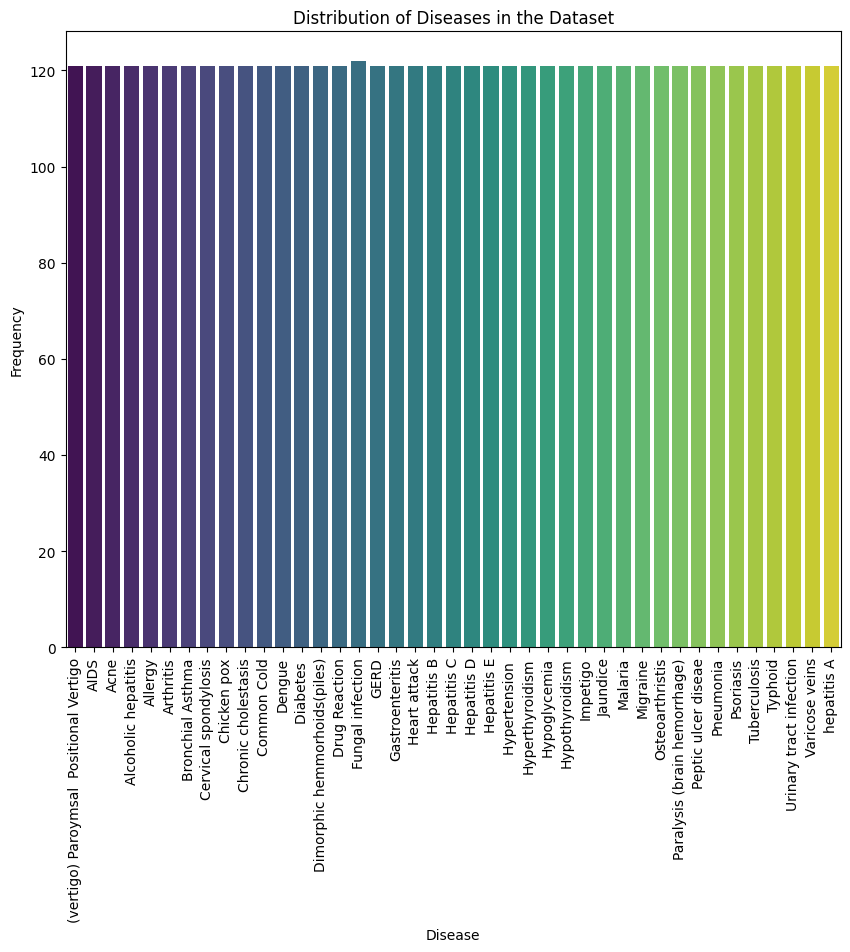

In [ ]:
# Distribution of the target variable 'prognosis'
prognosis_counts = merged_data['prognosis'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=prognosis_counts.index, y=prognosis_counts.values, palette='viridis')
plt.xticks(rotation=90) #to prevent overlap
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Diseases in the Dataset')
plt.show()

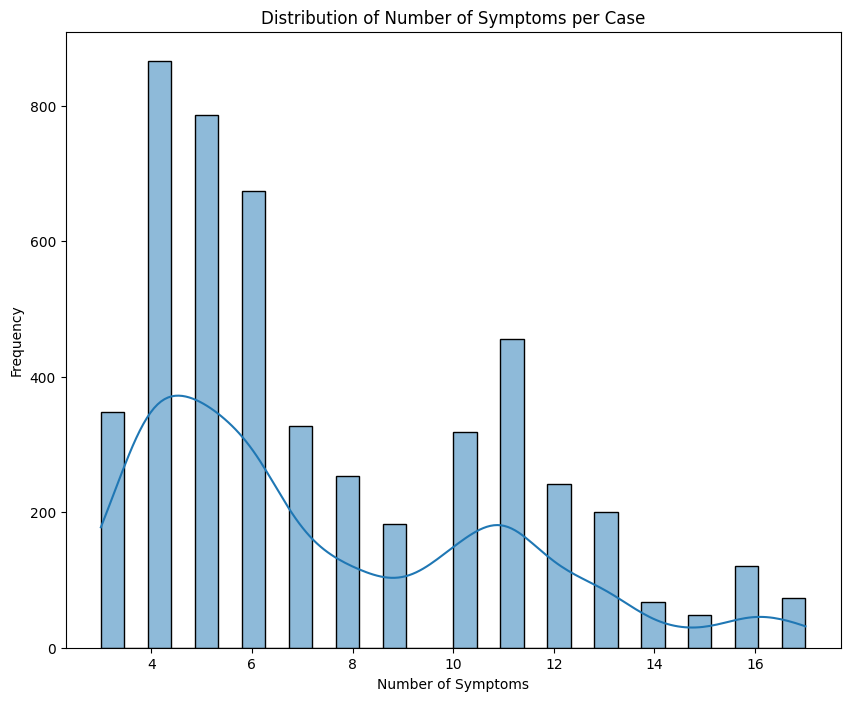

In [ ]:
# Count of symptoms per case
merged_data['symptom_count'] = merged_data.drop('prognosis', axis=1).sum(axis=1)
plt.figure(figsize=(10, 8))
sns.histplot(merged_data['symptom_count'], bins=30, kde=True)
plt.title('Distribution of Number of Symptoms per Case')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

In [ ]:
numeric_data = merged_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Function to find and display highly correlated pairs
def find_high_correlations(df, threshold=0.8):
    # Extract the upper triangle of the correlation matrix
    upper = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    # Find pairs with high absolute correlation
    high_corr = [(column, row, upper.loc[column, row]) for column in upper.columns for row in upper.columns if abs(upper.loc[column, row]) > threshold]
    # Sort pairs by absolute correlation value
    high_corr_sorted = sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)
    return high_corr_sorted

# Use the function to find and print highly correlated pairs
high_corr_pairs = find_high_correlations(correlation_matrix)
for pair in high_corr_pairs:
    print(f"High correlation between {pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Save the correlation matrix to a CSV file if needed
correlation_matrix.to_csv('correlation_matrix.csv')

High correlation between throat_irritation and redness_of_eyes: 1.00
High correlation between throat_irritation and sinus_pressure: 1.00
High correlation between throat_irritation and runny_nose: 1.00
High correlation between throat_irritation and congestion: 1.00
High correlation between throat_irritation and loss_of_smell: 1.00
High correlation between redness_of_eyes and sinus_pressure: 1.00
High correlation between redness_of_eyes and runny_nose: 1.00
High correlation between redness_of_eyes and congestion: 1.00
High correlation between redness_of_eyes and loss_of_smell: 1.00
High correlation between sinus_pressure and runny_nose: 1.00
High correlation between sinus_pressure and congestion: 1.00
High correlation between sinus_pressure and loss_of_smell: 1.00
High correlation between runny_nose and congestion: 1.00
High correlation between runny_nose and loss_of_smell: 1.00
High correlation between congestion and loss_of_smell: 1.00
High correlation between enlarged_thyroid and brit

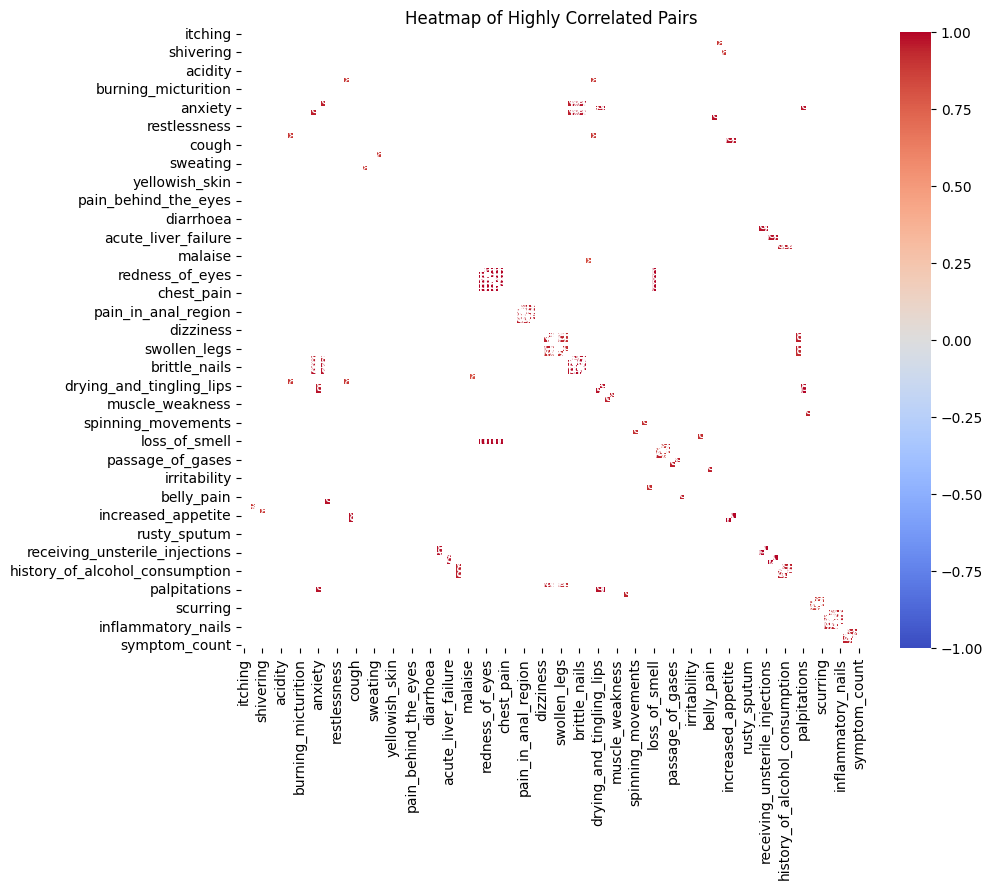

In [ ]:
# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Create a mask for absolute correlations greater than the threshold
high_corr = (abs(correlation_matrix) >= threshold)

# Replace correlations below the threshold with NaN
filtered_corr = correlation_matrix.where(high_corr, np.nan)

# Since the diagonal will always be 1, we can optionally set it to NaN if it doesn't add value
np.fill_diagonal(filtered_corr.values, np.nan)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Heatmap of Highly Correlated Pairs')
plt.show()

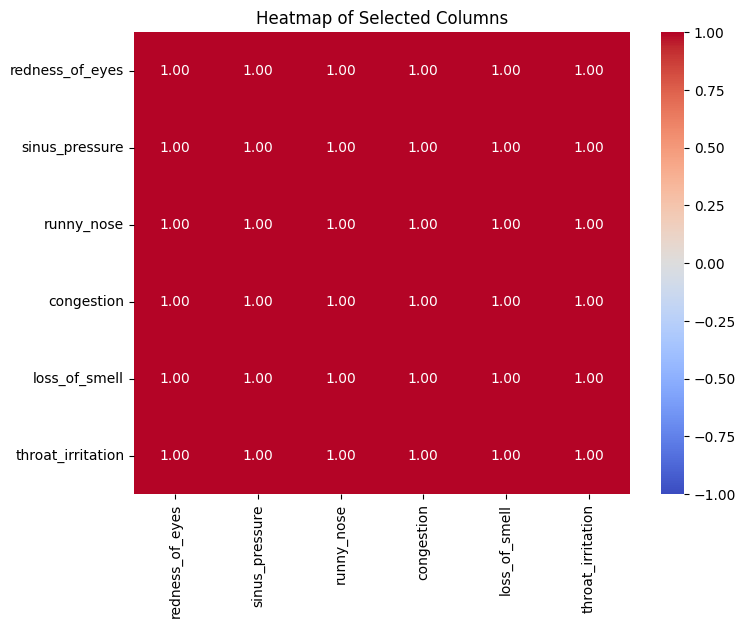

In [ ]:
columns_of_interest = ['redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'loss_of_smell', 'throat_irritation']

# Calculate the correlation matrix for the selected columns
correlation_matrix_1 = numeric_data[columns_of_interest].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Heatmap of Selected Columns')
plt.show()

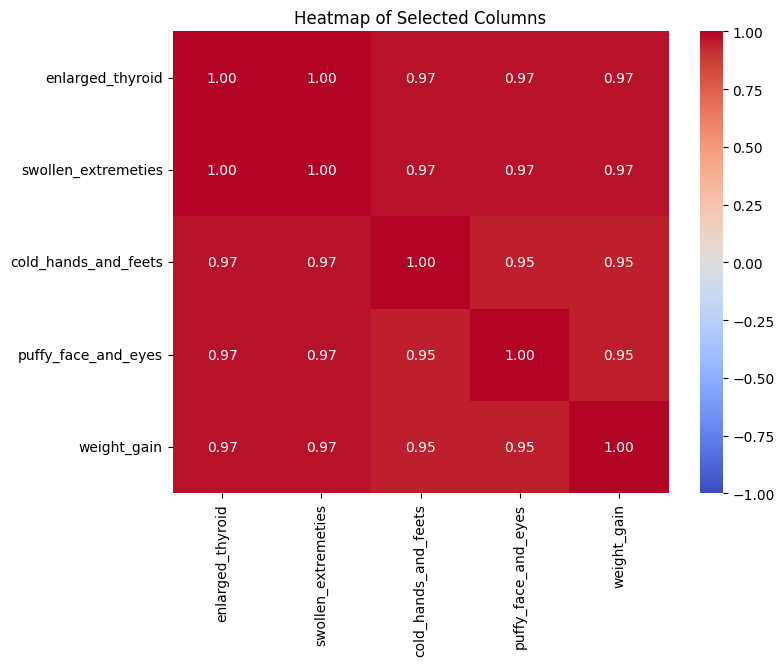

In [ ]:
columns_of_interest2 = ['enlarged_thyroid', 'swollen_extremeties', 'cold_hands_and_feets', 'puffy_face_and_eyes', 'weight_gain']

# Calculate the correlation matrix for the selected columns
correlation_matrix_2 = numeric_data[columns_of_interest2].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))  # You can adjust the size to fit your number of columns
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Heatmap of Selected Columns')
plt.show()

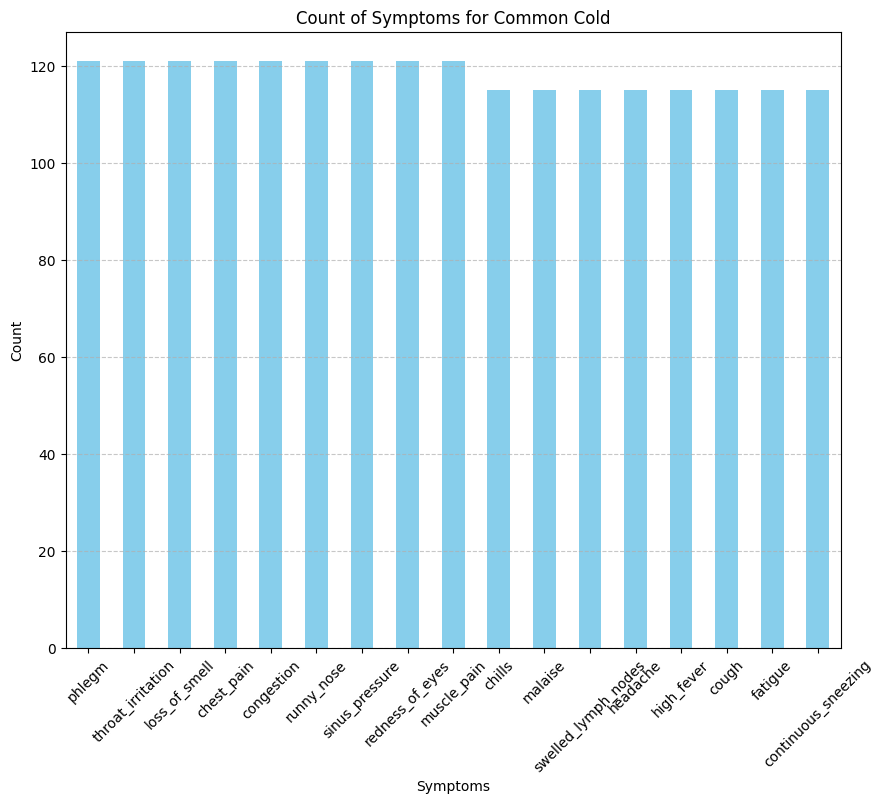

In [ ]:
disease_name = 'Common Cold'  # Update this as necessary
common_cold_data = merged_data[merged_data['prognosis'] == disease_name]

if not common_cold_data.empty:
    # Calculate the count of each symptom's occurrence
    symptom_counts = common_cold_data.drop(['prognosis'], axis=1).sum()

    # Filter symptoms where the count is greater than 1
    symptom_counts = symptom_counts[symptom_counts > 1]

    # Sort the symptoms by count for better visualization
    symptom_counts = symptom_counts.sort_values(ascending=False)

    # Create a bar chart if there are any symptoms to display
    if not symptom_counts.empty:
        plt.figure(figsize=(10, 8))
        symptom_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Count of Symptoms for {disease_name}')
        plt.xlabel('Symptoms')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("No symptoms with more than one occurrence for", disease_name)
else:
    print("No data available for disease:", disease_name)

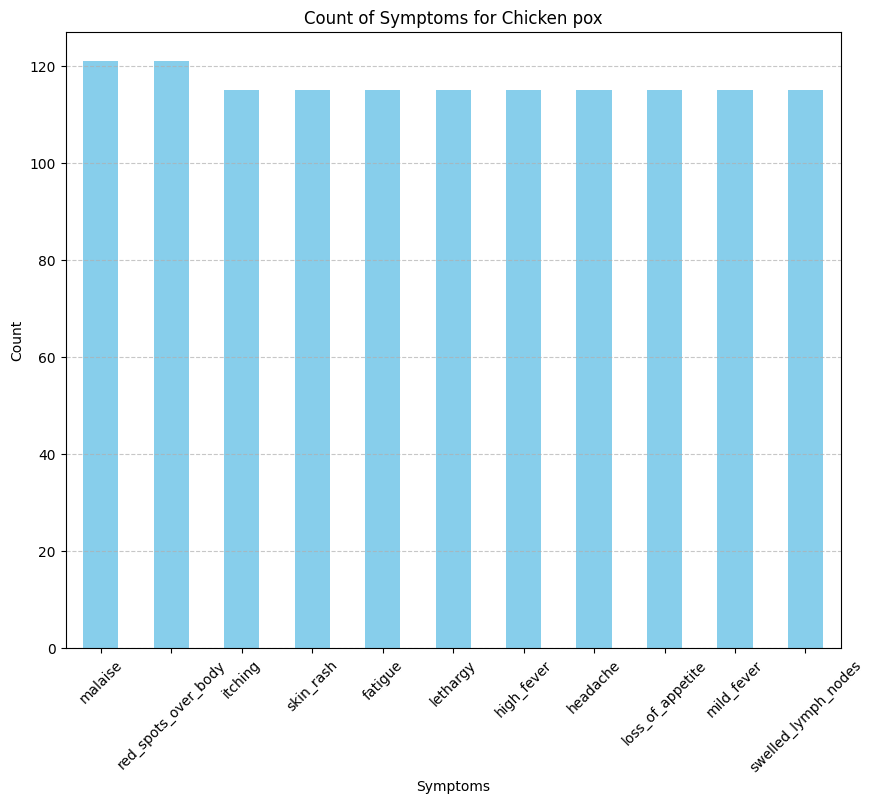

In [ ]:
disease_name = 'Chicken pox'
common_cold_data = merged_data[merged_data['prognosis'] == disease_name]

if not common_cold_data.empty:
    # Calculate the count of each symptom's occurrence
    symptom_counts = common_cold_data.drop(['prognosis'], axis=1).sum()

    # Filter symptoms where the count is greater than 1
    symptom_counts = symptom_counts[symptom_counts > 1]

    # Sort the symptoms by count for better visualization
    symptom_counts = symptom_counts.sort_values(ascending=False)

    # Create a bar chart if there are any symptoms to display
    if not symptom_counts.empty:
        plt.figure(figsize=(10, 8))
        symptom_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Count of Symptoms for {disease_name}')
        plt.xlabel('Symptoms')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("No symptoms with more than one occurrence for", disease_name)
else:
    print("No data available for disease:", disease_name)

In [ ]:
import networkx as nx

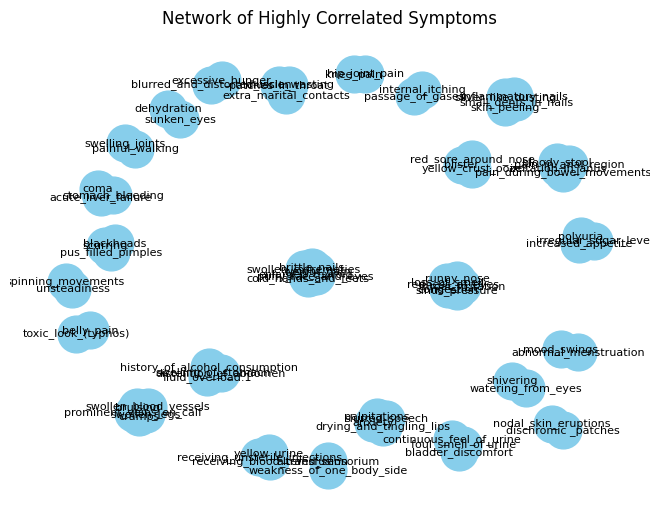

In [ ]:
# Function to extract highly correlated pairs
def get_high_corr_pairs(df, threshold=0.8):
    pairs = []
    for i in range(len(df.columns)):
        for j in range(i+1, len(df.columns)):
            if abs(df.iloc[i, j]) > threshold:
                pairs.append((df.columns[i], df.columns[j], df.iloc[i, j]))
    return pairs

high_corr_pairs = get_high_corr_pairs(correlation_matrix)

# Create a graph
G = nx.Graph()

# Add edges between highly correlated pairs
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=abs(pair[2]))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
edges = G.edges(data=True)
weights = [G[u][v]['weight'] * 10 for u, v in G.edges()]  # scale weights for visibility

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', width=weights, font_size=8)
plt.title('Network of Highly Correlated Symptoms')
plt.show()

In [ ]:
from pandas.plotting import parallel_coordinates

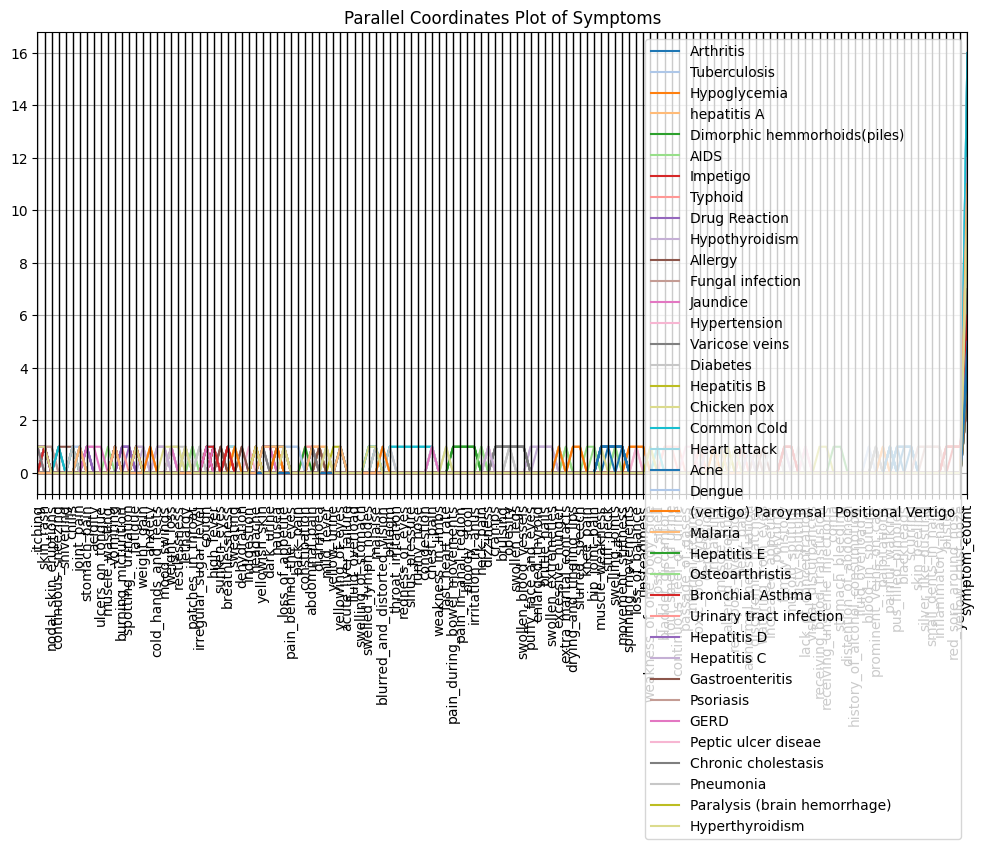

In [ ]:
merged_data['prognosis'] = merged_data['prognosis'].astype('category')

# Select a subset or use sampling if the data is very large
sampled_data = merged_data.sample(n=100)  # Adjust n according to your dataset size

# Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(sampled_data, 'prognosis', color=plt.cm.tab20.colors)
plt.title('Parallel Coordinates Plot of Symptoms')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [ ]:
# Remove the 'symptom_count' after analysis to keep the original DataFrame clean
merged_data.drop('symptom_count', axis=1, inplace=True)

In [ ]:
merged_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
4958,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
4960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis


In [ ]:
# Compute the Pearson correlation matrix because the variables are binary (symptoms are either 0 or 1), Using Phi COefficient, a suitable measure for binary data

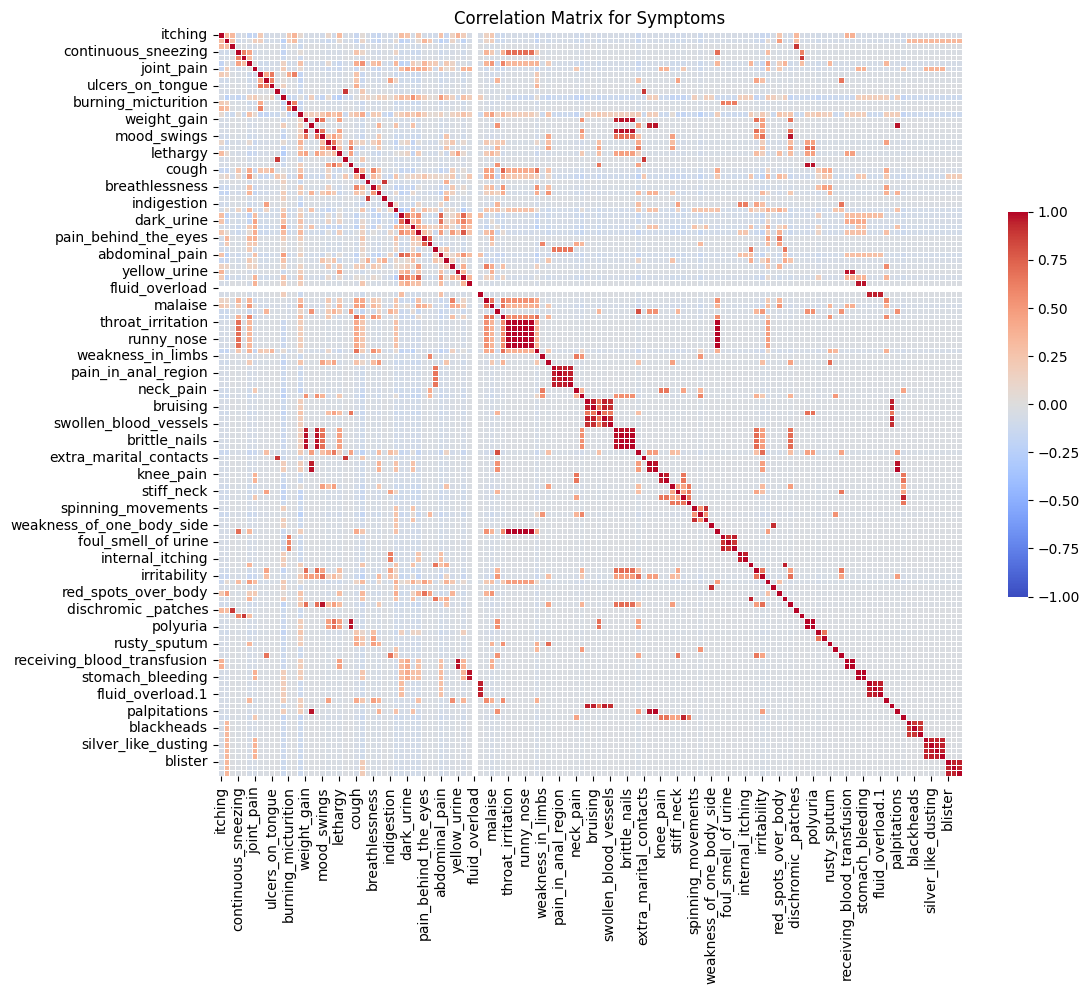

In [ ]:
correlation_matrix = merged_data.drop('prognosis', axis=1).corr()

plt.figure(figsize=(12, 10))

# heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Symptoms')
plt.show()

In [ ]:
column_to_drop = 'prognosis'
data = merged_data.drop(column_to_drop, axis=1)


In [ ]:
print(data)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           0          0                     0                    0   
1           0          0                     0                    0   
2           0          0                     0                    0   
3           0          0                     0                    0   
4           0          0                     0                    0   
...       ...        ...                   ...                  ...   
4957        0          0                     0                    0   
4958        1          1                     0                    0   
4959        0          0                     0                    0   
4960        0          0                     0                    0   
4961        0          0                     0                    1   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           1             0        0         

In [ ]:
print(merged_data.columns)
Y = merged_data['prognosis']

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_prog =LabelEncoder()
label_prog.fit(Y)
encoded_Y = label_prog.transform(Y)

In [ ]:
print(training_data.columns)


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [ ]:
#Training and Testing data splitting
from sklearn.model_selection import train_test_split

X = data # Features (removing the target column)
Y = encoded_Y # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3969, 132)
X_test shape: (993, 132)
Y_train shape: (3969,)
Y_test shape: (993,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.sparse as sp
#USing RandomForestClassifier

In [ ]:
# Defining the model
model = RandomForestClassifier()

# Training the model
model.fit(X_train, Y_train)

# Making predictions
Y_pred = model.predict(X_test)

# Evaluating the model
accuracy_RFC = accuracy_score(Y_test, Y_pred)
precision_RFC = precision_score(Y_test, Y_pred, average='weighted')
recall_RFC = recall_score(Y_test, Y_pred, average='weighted')
f1_RFC = f1_score(Y_test, Y_pred, average='weighted')

# Displaying the evaluation metrics
results = pd.DataFrame({
    "Model": ["RandomForest"],
    "Accuracy": [accuracy_RFC],
    "Precision": [precision_RFC],
    "Recall": [recall_RFC],
    "F1 Score": [f1_RFC]
})
print(results)

          Model  Accuracy  Precision  Recall  F1 Score
0  RandomForest       1.0        1.0     1.0       1.0


In [ ]:
#using Decision
from sklearn.tree import DecisionTreeClassifier

dectree_classifier = DecisionTreeClassifier()

dectree_classifier.fit(X_train, Y_train)

Y_pred = dectree_classifier.predict(X_test)


#Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted')

recall = recall_score(Y_test, Y_pred, average='weighted')

f1 = f1_score(Y_test, Y_pred, average='weighted')

#Generating tabular report
results = [{"Model": 'DecisionTree', "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}]
results_dectree = pd.DataFrame(results)
print(results)



[{'Model': 'DecisionTree', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}]


In [ ]:
import xgboost as xgb

# XGBoost Classifier
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, Y_train)
Y_pred_xgb = model_xgb.predict(X_test)
# Evaluate XGBoost model
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
precision_xgb = precision_score(Y_test, Y_pred_xgb, average='weighted')
recall_xgb = recall_score(Y_test, Y_pred_xgb, average='weighted')
f1_xgb = f1_score(Y_test, Y_pred_xgb, average='weighted')

results_xgb = pd.DataFrame({
    "Model": ["XGBoost"],
    "Accuracy": [accuracy_xgb],
    "Precision": [precision_xgb],
    "Recall": [recall_xgb],
    "F1 Score": [f1_xgb]
})
print(results_xgb)

     Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost  0.998993   0.999025  0.998993  0.998989


In [ ]:
from sklearn.svm import SVC
# Support Vector Machine Classifier
model_svm = SVC()
model_svm.fit(X_train, Y_train)
Y_pred_svm = model_svm.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm, average='weighted')
recall_svm = recall_score(Y_test, Y_pred_svm, average='weighted')
f1_svm = f1_score(Y_test, Y_pred_svm, average='weighted')

results_svm = pd.DataFrame({
    "Model": ["SVM"],
    "Accuracy": [accuracy_svm],
    "Precision": [precision_svm],
    "Recall": [recall_svm],
    "F1 Score": [f1_svm]
})
print(results_svm)

  Model  Accuracy  Precision  Recall  F1 Score
0   SVM       1.0        1.0     1.0       1.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
# Neural Network Model
model_nn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(41, activation='softmax')
])
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_nn.fit(X_train, keras.utils.to_categorical(Y_train), epochs=10, validation_split=0.2)

# Evaluate Neural Network model
_, accuracy_nn = model_nn.evaluate(X_test, keras.utils.to_categorical(Y_test))
print("Neural Network - Accuracy: {:.2f}".format(accuracy_nn))


Epoch 1/10
100/100 [==============================] - 3s 15ms/step - loss: 2.6805 - accuracy: 0.6510 - val_loss: 1.1994 - val_accuracy: 0.9761
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 0.4018 - accuracy: 0.9934 - val_loss: 0.1083 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 1s 8ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 3s 27ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 2s 20ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 1s 14ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Ep